In [1]:
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=18)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

D:\Anaconda\envs\numpy\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [54]:
result_dishes = pd.read_csv(r'results/9-8/Report_DISHES.csv')
result_cd = pd.read_csv(r'results/9-8/Report_CD.csv')
result_kmns = pd.read_csv(r'results/9-8/Report_kmeans.csv')
result_kmns_o = pd.read_csv(r'results/9-8/Report_kmeans-open.csv')

print('DISHES:')
print(result_dishes)

print('CD Fusion:')
print(result_cd)

print('Kmns:')
print(result_kmns)

print('Kmns-open:')
print(result_kmns_o)

DISHES:
    Case  Timecost  S_mean  S_std       NMI  Perfect_recover  RMSE_beta  \
0      1  0.025889     5.0   0.00  1.000000              1.0   0.013737   
1      2  0.070540     5.0   0.00  1.000000              1.0   0.010179   
2      3  0.134634     5.0   0.00  1.000000              1.0   0.008688   
3      4  0.220209     5.0   0.00  1.000000              1.0   0.006919   
4      5  0.334538     5.2   0.42  0.997998              0.8   0.006182   
5      6  0.462403     5.1   0.32  0.999472              0.9   0.006497   
6      7  0.020347     3.1   0.32  0.996416              0.9   0.015229   
7      8  0.029397     7.0   0.00  1.000000              1.0   0.015605   
8      9  0.037304     9.0   0.00  1.000000              1.0   0.013790   
9     10  0.044091     5.0   0.00  1.000000              1.0   0.015896   
10    11  0.063721     5.0   0.00  1.000000              1.0   0.016617   
11    12  0.084946     5.0   0.00  1.000000              1.0   0.018450   
12    13  0.10649

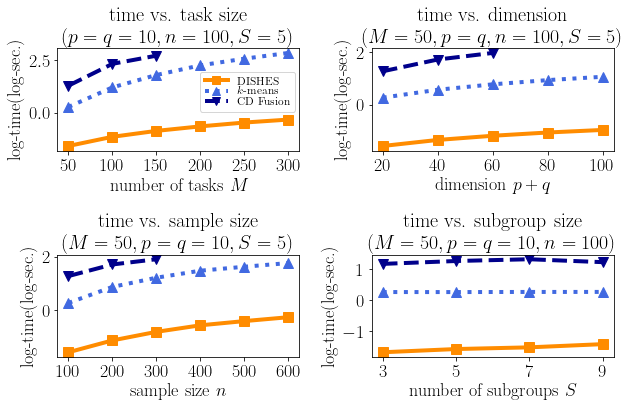

In [115]:
#######################################################################
#############################  Time.pdf  ##############################

fig = plt.figure(figsize=(9,6))
EE_color = 'darkorange'
kmns_color = 'royalblue'
kmns_o_color = 'cornflowerblue'
mtl_color = 'darkblue'
mark_size = 10
line_width = 4
legend_fontsize = 11.5
legend_markerscale = 0.8
################################################################################################

################################### time vs M ####################################
ax = fig.add_subplot(221)
M = [50, 100, 150, 200, 250, 300]
ax.set_xticks(M)
ax.set_xlabel(r'number of tasks $M$')
ax.set_ylabel('log-time(log-sec.)')
ax.set_title('time vs. task size\n($p=q=10,n=100,S=5$)', horizontalalignment='center', fontsize=20)

ax.plot(M, np.log10(result_dishes['Timecost'][:6]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')

ax.plot(M, np.log10(result_kmns['Timecost'][:6]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')
# ax.plot(M, np.log10(result_kmns_o['Timecost'][:6]),'o:', color=kmns_o_color, ms=mark_size, linewidth=line_width, label=r'$S$-means')

ax.plot(M[:3], np.log10(result_cd['Timecost'][:3]), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

ax.legend(loc=(0.59,0.38), frameon=True,fontsize=legend_fontsize,labelspacing=0,markerscale=legend_markerscale,borderaxespad=0.5)

#################################### time vs p+q ###################################

ax = fig.add_subplot(222)
p = [20, 40, 60, 80, 100]
ax.set_xticks(p)
ax.set_xlabel(r'dimension $p+q$')
ax.set_ylabel('log-time(log-sec.)')
ax.set_title('time vs. dimension\n($M=50,p=q,n=100,S=5$)', horizontalalignment='center', fontsize=20)

ax.plot(p, np.log10(result_dishes['Timecost'][[0,9,10,11,12]]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')

ax.plot(p, np.log10(result_kmns['Timecost'][[0,9,10,11,12]]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')
# ax.plot(p, np.log10(result_kmns_o['Timecost'][[0,9,10,11,12]]),'o:', color=kmns_o_color, ms=mark_size, linewidth=line_width, label=r'$S$-means')

ax.plot(p[:3], np.log10(result_cd['Timecost'][[0,6,7]]), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

# ax.legend(loc=(0.59,0.28), frameon=True,fontsize=legend_fontsize,labelspacing=0,markerscale=legend_markerscale,borderaxespad=0.5)

################################### time vs n ####################################
ax = fig.add_subplot(223)
n = [100, 200, 300, 400, 500, 600]
ax.set_xticks(n)
ax.set_xlabel(r'sample size $n$')
ax.set_ylabel('log-time(log-sec.)')
ax.set_title('time vs. sample size\n($M=50,p=q=10,S=5$)', horizontalalignment='center', fontsize=20)

ax.plot(n, np.log10(result_dishes['Timecost'][[0, 13,14,15,16,17]]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')

ax.plot(n, np.log10(result_kmns['Timecost'][[0, 13,14,15,16,17]]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')
# ax.plot(n, np.log10(result_kmns_o['Timecost'][[0, 13,14,15,16,17]]),'o:', color=kmns_o_color, ms=mark_size, linewidth=line_width, label=r'$S$-means')

ax.plot(n[:3], np.log10(result_cd['Timecost'][[0,8,9]]), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

# ax.legend(loc='upper right', frameon=False,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=-0.2,markerscale=legend_markerscale)

################################### time vs S ####################################
ax = fig.add_subplot(224)
S = [3,5,7,9]
ax.set_xticks(S)
ax.set_xlabel(r'number of subgroups $S$')
ax.set_ylabel('log-time(log-sec.)')
ax.set_title('time vs. subgroup size\n($M=50,p=q=10,n=100$)', horizontalalignment='center', fontsize=20)

ax.plot(S, np.log10(result_dishes['Timecost'][[6,0,7,8]]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')

ax.plot(S, np.log10(result_kmns['Timecost'][[6,0,7,8]]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')
# ax.plot(S, np.log10(result_kmns_o['Timecost'][[0,6,7,8]]),'o:', color=kmns_o_color, ms=mark_size, linewidth=line_width, label=r'$S$-means')

ax.plot(S, np.log10(result_cd['Timecost'][[3,0,4,5]]), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

# ax.legend(loc='upper right', frameon=False,fontsize=legend_fontsize,labelspacing=0,markerscale=legend_markerscale)

################################################################################################

plt.tight_layout()
plt.savefig('time.pdf',format='pdf',bbox_inches = 'tight')
plt.show()

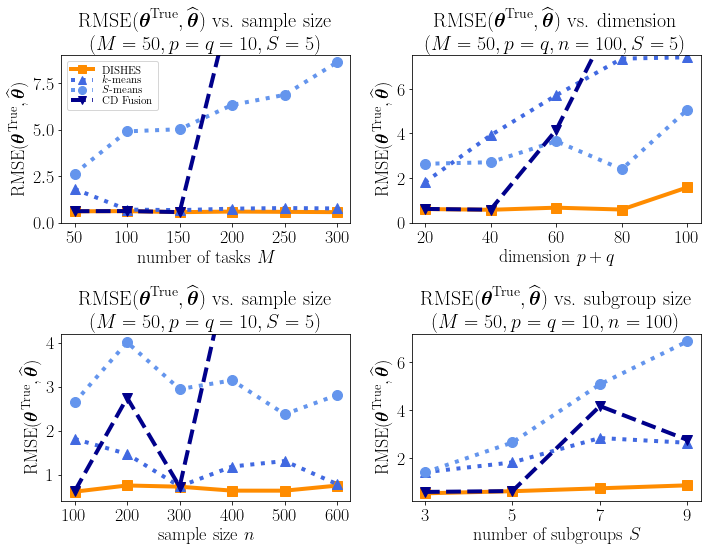

In [130]:
#############################################################################
#############################  RMSE_theta.pdf  ##############################

fig = plt.figure(figsize=(10,8))
EE_color = 'darkorange'
kmns_color = 'royalblue'
kmns_o_color = 'cornflowerblue'
mtl_color = 'darkblue'
mark_size = 10
line_width = 4
legend_fontsize = 11
legend_markerscale = 0.8
bar_width = 10.5
err_paras = dict(elinewidth=2, capsize=4)

################################### RMSE vs M ####################################
ax = fig.add_subplot(221)
M = np.array([50, 100, 150, 200, 250, 300])
ax.set_xticks(M)
ax.set_xlabel(r'number of tasks $M$')
ax.set_ylabel(r'RMSE($\boldsymbol{\theta}^\text{True}, \widehat{\boldsymbol\theta}$)')
ax.set_title('RMSE($\\boldsymbol{\\theta}^\\text{True}, \\widehat{\\boldsymbol\\theta}$) vs. sample size\n($M=50,p=q=10,S=5$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([0,9])

ax.plot(M, (result_dishes['RMSE_theta'][:6]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')
ax.plot(M, (result_kmns['RMSE_theta'][:6]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')
ax.plot(M, (result_kmns_o['RMSE_theta'][:6]),'o:', color=kmns_o_color, ms=mark_size, linewidth=line_width, label=r'$S$-means')
ax.plot(M[:4], (*result_cd['RMSE_theta'][:3], 12), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

ax.legend(loc='upper left', frameon=True,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0.5,markerscale=legend_markerscale)

################################### RMSE vs p+q ####################################

ax = fig.add_subplot(222)
p = np.array([20, 40, 60, 80, 100])
ax.set_xticks(p)
ax.set_xlabel(r'dimension $p+q$')
ax.set_ylabel(r'RMSE($\boldsymbol{\theta}^\text{True}, \widehat{\boldsymbol\theta}$)')
ax.set_title('RMSE($\\boldsymbol{\\theta}^\\text{True}, \\widehat{\\boldsymbol\\theta}$) vs. dimension\n($M=50,p=q,n=100,S=5$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([0,7.5])

ax.plot(p, (result_dishes['RMSE_theta'][[0,9,10,11,12]]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')
ax.plot(p, (result_kmns['RMSE_theta'][[0,9,10,11,12]]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')
ax.plot(p, (result_kmns_o['RMSE_theta'][[0,9,10,11,12]]),'o:', color=kmns_o_color, ms=mark_size, linewidth=line_width, label=r'$S$-means')
ax.plot(p[:4], (*result_cd['RMSE_theta'][[0,6,7]], 10), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

# ax.legend(loc='upper left', frameon=True,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0.5,markerscale=legend_markerscale)


################################### RMSE vs n ####################################
ax = fig.add_subplot(223)
n = np.array([100, 200, 300, 400, 500, 600])
ax.set_xticks(n)
ax.set_xlabel(r'sample size $n$')
ax.set_ylabel(r'RMSE($\boldsymbol{\theta}^\text{True}, \widehat{\boldsymbol\theta}$)')
ax.set_title('RMSE($\\boldsymbol{\\theta}^\\text{True}, \\widehat{\\boldsymbol\\theta}$) vs. sample size\n($M=50,p=q=10,S=5$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([0.4,4.2])

ax.plot(n, (result_dishes['RMSE_theta'][[0,13,14,15,16,17]]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')
ax.plot(n, (result_kmns['RMSE_theta'][[0,13,14,15,16,17]]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')
ax.plot(n, (result_kmns_o['RMSE_theta'][[0,13,14,15,16,17]]),'o:', color=kmns_o_color, ms=mark_size, linewidth=line_width, label=r'$S$-means')
ax.plot(n[:4], (*result_cd['RMSE_theta'][[0,8,9]],6), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

# ax.legend(loc='upper right', frameon=True,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0.5,markerscale=legend_markerscale)

################################### RMSE vs S ####################################
ax = fig.add_subplot(224)
S = np.array([3,5,7,9])
ax.set_xticks(S)
ax.set_xlabel(r'number of subgroups $S$')
ax.set_ylabel(r'RMSE($\boldsymbol{\theta}^\text{True}, \widehat{\boldsymbol\theta}$)')
ax.set_title('RMSE($\\boldsymbol{\\theta}^\\text{True}, \\widehat{\\boldsymbol\\theta}$) vs. subgroup size\n($M=50,p=q=10,n=100$)', horizontalalignment='center', fontsize=20)
# ax.set_ylim([0,2])

ax.plot(S, (result_dishes['RMSE_theta'][[6,0,7,8]]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')
ax.plot(S, (result_kmns['RMSE_theta'][[6,0,7,8]]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')
ax.plot(S, (result_kmns_o['RMSE_theta'][[6,0,7,8]]),'o:', color=kmns_o_color, ms=mark_size, linewidth=line_width, label=r'$S$-means')
ax.plot(S, (result_cd['RMSE_theta'][[6,0,7,8]]), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

# ax.legend(loc='upper left', frameon=True,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0.5,markerscale=legend_markerscale)


plt.tight_layout()
plt.savefig('RMSE_theta_line.pdf',format='pdf',bbox_inches = 'tight')
plt.show()

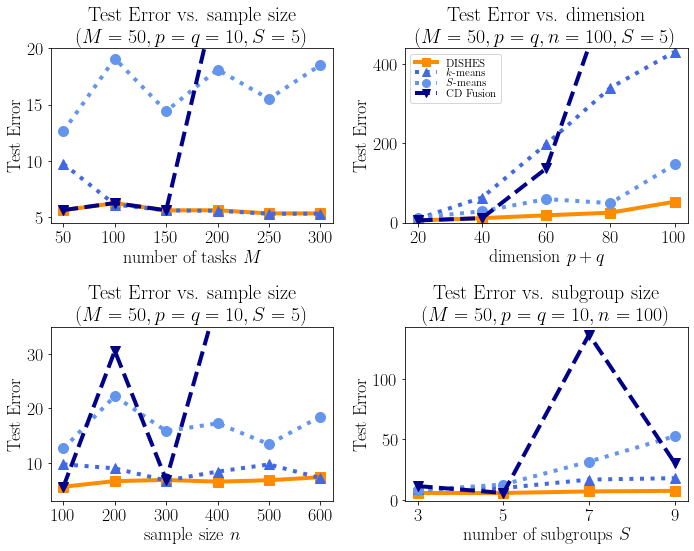

In [143]:
#############################################################################
#############################  Error.pdf  ##############################

fig = plt.figure(figsize=(10,8))
EE_color = 'darkorange'
kmns_color = 'royalblue'
kmns_o_color = 'cornflowerblue'
mtl_color = 'darkblue'
mark_size = 10
line_width = 4
legend_fontsize = 11
legend_markerscale = 0.8
bar_width = 10.5
err_paras = dict(elinewidth=2, capsize=4)

################################### RMSE vs M ####################################
ax = fig.add_subplot(221)
M = np.array([50, 100, 150, 200, 250, 300])
ax.set_xticks(M)
ax.set_xlabel(r'number of tasks $M$')
ax.set_ylabel(r'Test Error')
ax.set_title('Test Error vs. sample size\n($M=50,p=q=10,S=5$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([4.5,20])

ax.plot(M, (result_dishes['Error'][:6]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')
ax.plot(M, (result_kmns['Error'][:6]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')
ax.plot(M, (result_kmns_o['Error'][:6]),'o:', color=kmns_o_color, ms=mark_size, linewidth=line_width, label=r'$S$-means')
ax.plot(M[:4], (*result_cd['Error'][:3], 25), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

# ax.legend(loc='upper left', frameon=True,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0.5,markerscale=legend_markerscale)

################################### RMSE vs p+q ####################################

ax = fig.add_subplot(222)
p = np.array([20, 40, 60, 80, 100])
ax.set_xticks(p)
ax.set_xlabel(r'dimension $p+q$')
ax.set_ylabel(r'Test Error')
ax.set_title('Test Error vs. dimension\n($M=50,p=q,n=100,S=5$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([0,440])

ax.plot(p, (result_dishes['Error'][[0,9,10,11,12]]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')
ax.plot(p, (result_kmns['Error'][[0,9,10,11,12]]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')
ax.plot(p, (result_kmns_o['Error'][[0,9,10,11,12]]),'o:', color=kmns_o_color, ms=mark_size, linewidth=line_width, label=r'$S$-means')
ax.plot(p[:4], (*result_cd['Error'][[0,6,7]], 600), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

ax.legend(loc='upper left', frameon=True,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0.5,markerscale=legend_markerscale)



################################### RMSE vs n ####################################
ax = fig.add_subplot(223)
n = np.array([100, 200, 300, 400, 500, 600])
ax.set_xticks(n)
ax.set_xlabel(r'sample size $n$')
ax.set_ylabel(r'Test Error')
ax.set_title('Test Error vs. sample size\n($M=50,p=q=10,S=5$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([3,35])

ax.plot(n, (result_dishes['Error'][[0,13,14,15,16,17]]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')
ax.plot(n, (result_kmns['Error'][[0,13,14,15,16,17]]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')
ax.plot(n, (result_kmns_o['Error'][[0,13,14,15,16,17]]),'o:', color=kmns_o_color, ms=mark_size, linewidth=line_width, label=r'$S$-means')
ax.plot(n[:4], (*result_cd['Error'][[0,8,9]],40), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

# ax.legend(loc='upper right', frameon=True,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0.5,markerscale=legend_markerscale)

################################### RMSE vs S ####################################
ax = fig.add_subplot(224)
S = np.array([3,5,7,9])
ax.set_xticks(S)
ax.set_xlabel(r'number of subgroups $S$')
ax.set_ylabel(r'Test Error')
ax.set_title('Test Error vs. subgroup size\n($M=50,p=q=10,n=100$)', horizontalalignment='center', fontsize=20)
# ax.set_ylim([0,2])

ax.plot(S, (result_dishes['Error'][[6,0,7,8]]), 's-', color=EE_color, ms=mark_size, linewidth=line_width, label=r'DISHES')
ax.plot(S, (result_kmns['Error'][[6,0,7,8]]),'^:', color=kmns_color, ms=mark_size, linewidth=line_width, label=r'$k$-means')
ax.plot(S, (result_kmns_o['Error'][[6,0,7,8]]),'o:', color=kmns_o_color, ms=mark_size, linewidth=line_width, label=r'$S$-means')
ax.plot(S, (result_cd['Error'][[6,0,7,8]]), 'v--', color=mtl_color, ms=mark_size, linewidth=line_width, label=r'CD Fusion')

# ax.legend(loc='upper left', frameon=True,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0.5,markerscale=legend_markerscale)


plt.tight_layout()
plt.savefig('Error_line.pdf',format='pdf',bbox_inches = 'tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,8))
EE_color = 'darkorange'
kmns_color = 'royalblue'
kmns_o_color = 'cornflowerblue'
mtl_color = 'darkblue'
mark_size = 10
line_width = 0.75
legend_fontsize = 11
legend_markerscale = 0.8
bar_width = 10.5
err_paras = dict(elinewidth=2, capsize=4)

################################### RMSE vs M ####################################
ax = fig.add_subplot(221)
M = np.array([50, 100, 150, 200, 250, 300])
ax.set_xticks(M)
ax.set_xlabel(r'number of tasks $M$')
ax.set_ylabel(r'RMSE($\boldsymbol{\theta}^\text{True}, \widehat{\boldsymbol\theta}$)')
ax.set_title('RMSE($\\boldsymbol{\\theta}^\\text{True}, \\widehat{\\boldsymbol\\theta}$) vs. sample size\n($M=50,p=q=10,S=5$)', horizontalalignment='center', fontsize=20)
# ax.set_ylim([0,3])

# ax.bar(M-bar_width, result_dishes['RMSE_theta'][:6], width=bar_width, color=EE_color, edgecolor='k', linewidth=line_width, error_kw=err_paras, yerr=result_dishes['RMSE_theta_std'][:6], label=r'DISHES')
# ax.bar(M+bar_width, result_kmns['RMSE_theta'][:6], width=bar_width, color=kmns_color, edgecolor='k', linewidth=line_width, error_kw=err_paras, yerr=result_kmns['RMSE_theta_std'][:6], label=r'$k$-means')
# ax.bar(M[:3], result_cd['RMSE_theta'][:3], width=bar_width, color=mtl_color, edgecolor='k', linewidth=line_width, error_kw=err_paras, yerr=result_cd['RMSE_theta_std'][:3], label=r'CD Fusion')

ax.bar(M[:3]-bar_width*1.5, np.log10(result_dishes['RMSE_theta'][:3]), width=bar_width, color=EE_color, edgecolor='k', linewidth=line_width, label=r'DISHES')
ax.bar(M[:3]+bar_width*0.5, np.log10(result_kmns['RMSE_theta'][:3]), width=bar_width, color=kmns_color, edgecolor='k', linewidth=line_width, label=r'$k$-means')
ax.bar(M[:3]+bar_width*1.5, np.log10(result_kmns_o['RMSE_theta'][:3]), width=bar_width, color=kmns_o_color, edgecolor='k', linewidth=line_width, label=r'$S$-means')
ax.bar(M[:3]-bar_width*0.5, np.log10(result_cd['RMSE_theta'][:3]), width=bar_width, color=mtl_color, edgecolor='k', linewidth=line_width, label=r'CD Fusion')

ax.bar(M[3:6]-bar_width, np.log10(result_dishes['RMSE_theta'][3:6]), width=bar_width, color=EE_color, edgecolor='k', linewidth=line_width)
ax.bar(M[3:6], np.log10(result_kmns['RMSE_theta'][3:6]), width=bar_width, color=kmns_color, edgecolor='k', linewidth=line_width)
ax.bar(M[3:6]+bar_width, np.log10(result_kmns_o['RMSE_theta'][3:6]), width=bar_width, color=kmns_o_color, edgecolor='k', linewidth=line_width)

# ax.legend(loc='upper right', frameon=True,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0.5,markerscale=legend_markerscale)

################################### RMSE vs p+q ####################################

ax = fig.add_subplot(222)
p = np.array([20, 40, 60, 80, 100])
ax.set_xticks(p)
ax.set_xlabel(r'dimension $p+q$')
ax.set_ylabel(r'RMSE($\boldsymbol{\theta}^\text{True}, \widehat{\boldsymbol\theta}$)')
ax.set_title('RMSE($\\boldsymbol{\\theta}^\\text{True}, \\widehat{\\boldsymbol\\theta}$) vs. dimension\n($M=50,p=q,n=100,S=5$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([0,8])

# ax.bar(p-bar_width/2.5, result_dishes['RMSE_theta'][[0,9,10,11,12]], width=bar_width/2.5, color=EE_color, edgecolor='k', linewidth=line_width, error_kw=err_paras, yerr=result_dishes['RMSE_theta_std'][[0,9,10,11,12]], label=r'DISHES')
# ax.bar(p+bar_width/2.5, result_kmns['RMSE_theta'][[0,9,10,11,12]], width=bar_width/2.5, color=kmns_color, edgecolor='k', linewidth=line_width, error_kw=err_paras, yerr=result_kmns['RMSE_theta_std'][[0,9,10,11,12]], label=r'$k$-means')
# ax.bar(p[:3], result_cd['RMSE_theta'][[0,6,7]], width=bar_width/2.5, color=mtl_color, edgecolor='k', linewidth=line_width, error_kw=err_paras, yerr=result_cd['RMSE_theta_std'][[0,6,7]], label=r'CD Fusion')

ax.bar(p[:3]-bar_width/2.5*1.5, np.log10(result_dishes['RMSE_theta'][[0,9,10]]), width=bar_width/2.5, color=EE_color, edgecolor='k', linewidth=line_width, label=r'DISHES')
ax.bar(p[:3]+bar_width/2.5*0.5, np.log10(result_kmns['RMSE_theta'][[0,9,10]]), width=bar_width/2.5, color=kmns_color, edgecolor='k', linewidth=line_width, label=r'$k$-means')
ax.bar(p[:3]+bar_width/2.5*1.5, np.log10(result_kmns_o['RMSE_theta'][[0,9,10]]), width=bar_width/2.5, color=kmns_o_color, edgecolor='k', linewidth=line_width, label=r'$S$-means')
ax.bar(p[:3]-bar_width/2.5*0.5, np.log10(result_cd['RMSE_theta'][[0,6,7]]), width=bar_width/2.5, color=mtl_color, edgecolor='k', linewidth=line_width, label=r'CD Fusion')

ax.bar(p[3:]-bar_width/2.5, np.log10(result_dishes['RMSE_theta'][[11,12]]), width=bar_width/2.5, color=EE_color, edgecolor='k', linewidth=line_width)
ax.bar(p[3:], np.log10(result_kmns['RMSE_theta'][[11,12]]), width=bar_width/2.5, color=kmns_color, edgecolor='k', linewidth=line_width)
ax.bar(p[3:]+bar_width/2.5, np.log10(result_kmns_o['RMSE_theta'][[11,12]]), width=bar_width/2.5, color=kmns_o_color, edgecolor='k', linewidth=line_width)


ax.legend(loc='upper left', frameon=True,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0.5,markerscale=legend_markerscale)


################################### RMSE vs n ####################################
ax = fig.add_subplot(223)
n = np.array([100, 200, 300, 400, 500, 600])
ax.set_xticks(n)
ax.set_xlabel(r'sample size $n$')
ax.set_ylabel(r'RMSE($\boldsymbol{\theta}^\text{True}, \widehat{\boldsymbol\theta}$)')
ax.set_title('RMSE($\\boldsymbol{\\theta}^\\text{True}, \\widehat{\\boldsymbol\\theta}$) vs. sample size\n($M=50,p=q=10,S=5$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([0,3])

# ax.bar(n-bar_width*2, result_dishes['RMSE_theta'][[0, 13,14,15,16,17]], width=bar_width*2, color=EE_color, edgecolor='k', linewidth=line_width, error_kw=err_paras, yerr=result_dishes['RMSE_theta_std'][[0, 13,14,15,16,17]], label=r'DISHES')
# ax.bar(n+bar_width*2, result_kmns['RMSE_theta'][[0, 13,14,15,16,17]], width=bar_width*2, color=kmns_color, edgecolor='k', linewidth=line_width, error_kw=err_paras, yerr=result_kmns['RMSE_theta_std'][[0, 13,14,15,16,17]], label=r'$k$-means')
# ax.bar(n[:3], result_cd['RMSE_theta'][[0,8,9]], width=bar_width*2, color=mtl_color, edgecolor='k', linewidth=line_width, error_kw=err_paras, yerr=result_cd['RMSE_theta_std'][[0,8,9]], label=r'CD Fusion')

ax.bar(n[:3]-bar_width*2*1.5, result_dishes['RMSE_theta'][[0, 13,14]], width=bar_width*2, color=EE_color, edgecolor='k', linewidth=line_width, label=r'DISHES')
ax.bar(n[:3]+bar_width*2*0.5, result_kmns['RMSE_theta'][[0, 13,14]], width=bar_width*2, color=kmns_color, edgecolor='k', linewidth=line_width, label=r'$k$-means')
ax.bar(n[:3]+bar_width*2*1.5, result_kmns_o['RMSE_theta'][[0, 13,14]], width=bar_width*2, color=kmns_o_color, edgecolor='k', linewidth=line_width, label=r'$S$-means')
ax.bar(n[:3]-bar_width*2*0.5, result_cd['RMSE_theta'][[0,8,9]], width=bar_width*2, color=mtl_color, edgecolor='k', linewidth=line_width, label=r'CD Fusion')

ax.bar(n[3:]-bar_width*2, result_dishes['RMSE_theta'][[15,16,17]], width=bar_width*2, color=EE_color, edgecolor='k', linewidth=line_width)
ax.bar(n[3:], result_kmns['RMSE_theta'][[15,16,17]], width=bar_width*2, color=kmns_color, edgecolor='k', linewidth=line_width)
ax.bar(n[3:]+bar_width*2, result_kmns_o['RMSE_theta'][[15,16,17]], width=bar_width*2, color=kmns_o_color, edgecolor='k', linewidth=line_width)

# ax.legend(loc='upper right', frameon=True,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0.5,markerscale=legend_markerscale)

################################### RMSE vs S ####################################
ax = fig.add_subplot(224)
S = np.array([3,5,7,9])
ax.set_xticks(S)
ax.set_xlabel(r'number of subgroups $S$')
ax.set_ylabel(r'RMSE($\boldsymbol{\theta}^\text{True}, \widehat{\boldsymbol\theta}$)')
ax.set_title('RMSE($\\boldsymbol{\\theta}^\\text{True}, \\widehat{\\boldsymbol\\theta}$) vs. subgroup size\n($M=50,p=q=10,n=100$)', horizontalalignment='center', fontsize=20)
ax.set_ylim([0,2])

# ax.bar(S-bar_width/25, result_dishes['RMSE_theta'][[0,6,7,8]], width=bar_width/25, color=EE_color, edgecolor='k', linewidth=line_width, error_kw=err_paras, yerr=result_dishes['RMSE_theta_std'][[0,6,7,8]], label=r'DISHES')
# ax.bar(S+bar_width/25, result_kmns['RMSE_theta'][[0,6,7,8]], width=bar_width/25, color=kmns_color, edgecolor='k', linewidth=line_width, error_kw=err_paras, yerr=result_kmns['RMSE_theta_std'][[0,6,7,8]], label=r'$k$-means')
# ax.bar(S, result_cd['RMSE_theta'][[0,3,4,5]], width=bar_width/25, color=mtl_color, edgecolor='k', linewidth=line_width, error_kw=err_paras, yerr=result_cd['RMSE_theta_std'][[0,3,4,5]], label=r'CD Fusion')

ax.bar(S-bar_width/30*1.5, result_dishes['RMSE_theta'][[0,6,7,8]], width=bar_width/30, color=EE_color, edgecolor='k', linewidth=line_width, label=r'DISHES')
ax.bar(S+bar_width/30*0.5, result_kmns['RMSE_theta'][[0,6,7,8]], width=bar_width/30, color=kmns_color, edgecolor='k', linewidth=line_width, label=r'$k$-means')
ax.bar(S+bar_width/30*1.5, result_kmns_o['RMSE_theta'][[0,6,7,8]], width=bar_width/30, color=kmns_o_color, edgecolor='k', linewidth=line_width, label=r'$S$-means')
ax.bar(S-bar_width/30*0.5, result_cd['RMSE_theta'][[0,3,4,5]], width=bar_width/30, color=mtl_color, edgecolor='k', linewidth=line_width, label=r'CD Fusion')

# ax.legend(loc='upper left', frameon=True,fontsize=legend_fontsize,labelspacing=0,columnspacing=0.5, borderaxespad=0.5,markerscale=legend_markerscale)


plt.tight_layout()
plt.savefig('RMSE_theta_log.pdf',format='pdf',bbox_inches = 'tight')
plt.show()